In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from pandas.core.internals.construction import dataclasses_to_dicts
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,  RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import statsmodels
from scipy.stats import norm

In [7]:
df=pd.read_csv('secondary_data.csv', sep=';')

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

#Usunięcie NaNów z kolumny Veil-type i zmiana wartości w kolumnie

In [10]:
df['veil-type']=df['veil-type'].fillna(0)

In [11]:
df['veil-type'] = df['veil-type'].replace({'u': 1}).astype(float)

In [12]:
#df.drop(['stem-color','veil-color','veil-type','spore-print-color'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  float64
 15  veil-color         

#Zmiana nazwy column

In [14]:
df=df.rename(columns={'cap-diameter':'cap_diameter'})
df=df.rename(columns={'cap-shape':'cap_shape'})
df=df.rename(columns={'cap-surface':'cap_surface'})
df=df.rename(columns={'cap-color':'cap_color'})
df=df.rename(columns={'does-bruise-or-bleed':'does_bruise_or_bleed'})
df=df.rename(columns={'gill-attachment':'gill_attachment'})
df=df.rename(columns={'gill-spacing':'gill_spacing'})
df=df.rename(columns={'gill-color':'gill_color'})
df=df.rename(columns={'stem-height':'stem_height'})
df=df.rename(columns={'stem-root':'stem_root'})
df=df.rename(columns={'stem-surface':'stem_surface'})
df=df.rename(columns={'has-ring':'has_ring'})
df=df.rename(columns={'ring-type':'ring_type'})
df=df.rename(columns={'veil-type':'veil_type'})
df=df.rename(columns={'spore-print-color':'spore_print_color'})

#Zmiana danych w class

In [15]:
df['class'] = df['class'].replace({'e': 1, 'p':0})

In [16]:
df['class'] = df['class'].astype(float)

In [17]:
set(df['stem_root'])

{'b', 'c', 'f', nan, 'r', 's'}

In [18]:
set(df['stem_surface'])

{'f', 'g', 'h', 'i', 'k', nan, 's', 't', 'y'}

In [19]:
set(df['ring_type'])

{'e', 'f', 'g', 'l', 'm', nan, 'p', 'r', 'z'}

In [20]:
set(df['has_ring'])

{'f', 't'}

#Zmiana danych w has_ring

In [21]:
df['has_ring'] = df['has_ring'].replace({'f': 0, 't':1}).astype(float)

In [22]:
set(df['has_ring'])

{0.0, 1.0}

In [23]:
set(df['gill_color'])

{'b', 'e', 'f', 'g', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'}

#Usunięcie kolumny spore_print_color

In [24]:
df.drop(['spore_print_color'], axis=1, inplace=True)

#Zmiana danych w kolumnie does_bruise_or_bleed

In [25]:
df['does_bruise_or_bleed'] = df['does_bruise_or_bleed'].replace({'f': 1, 't':2}).astype(float)

#Mapa korelacji

In [26]:
corr=df.corr()

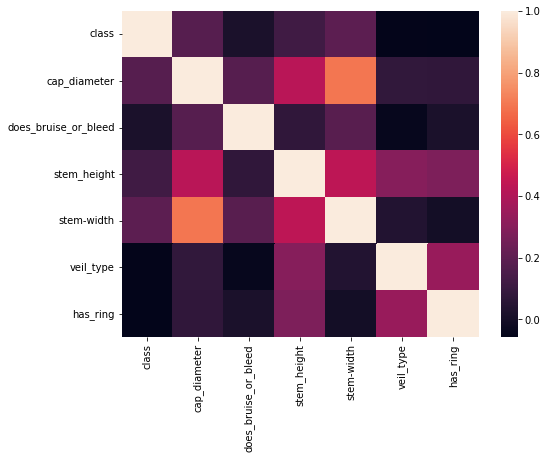

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(corr)

In [28]:
set(df['stem_root'])

{'b', 'c', 'f', nan, 'r', 's'}

In [29]:
df.stem_root.value_counts()

s    3177
b    3177
r    1412
f    1059
c     706
Name: stem_root, dtype: int64

#Usunięcie kolumny stem_root

In [30]:
df.drop(['stem_root'], axis=1, inplace=True)

#Podział klasy na grzyby jadalne i niejadalne

In [31]:
class0=df[df['class']==0]

In [32]:
class1=df[df['class']==1]

In [33]:
class0['ring_type'].value_counts()

f    26828
z     2118
e     1376
p      717
r      706
l      550
g      534
Name: ring_type, dtype: int64

In [34]:
class1['ring_type'].value_counts()

f    21533
e     1059
l      877
g      706
r      693
p      548
m      353
Name: ring_type, dtype: int64

In [35]:
class0.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem-width,stem_surface,stem-color,veil_type,veil-color,has_ring,ring_type,habitat,season
0,0.0,15.26,x,g,o,1.0,e,NaN,w,16.95,17.09,y,w,1.0,w,1.0,g,d,w
1,0.0,16.60,x,g,o,1.0,e,NaN,w,17.99,18.19,y,w,1.0,w,1.0,g,d,u
2,0.0,14.07,x,g,o,1.0,e,NaN,w,17.80,17.74,y,w,1.0,w,1.0,g,d,w
3,0.0,14.17,f,h,e,1.0,e,NaN,w,15.77,15.98,y,w,1.0,w,1.0,p,d,w
4,0.0,14.64,x,h,o,1.0,e,NaN,w,16.53,17.20,y,w,1.0,w,1.0,p,d,w


In [36]:
class0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33888 entries, 0 to 61068
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 33888 non-null  float64
 1   cap_diameter          33888 non-null  float64
 2   cap_shape             33888 non-null  object 
 3   cap_surface           26475 non-null  object 
 4   cap_color             33888 non-null  object 
 5   does_bruise_or_bleed  33888 non-null  float64
 6   gill_attachment       27534 non-null  object 
 7   gill_spacing          19768 non-null  object 
 8   gill_color            33888 non-null  object 
 9   stem_height           33888 non-null  float64
 10  stem-width            33888 non-null  float64
 11  stem_surface          14473 non-null  object 
 12  stem-color            33888 non-null  object 
 13  veil_type             33888 non-null  float64
 14  veil-color            4236 non-null   object 
 15  has_ring           

Tym podziałem chcieliśmy sprawdzić czy są jakieś zależności określające czy jakiś grzyb jest jadalny czy nie jadalny. Jednak po sprawdzeniu ilości danych w każdej kolumnie twierdziliśmy, że danych jest zbyt mało, a różnica między danymi w zbiorach zbyt mała by zauważyć korelację.

#Zmiana danych w gill_spacing

In [37]:
set(df['gill_spacing'])

{'c', 'd', 'f', nan}

In [38]:
df.gill_spacing.value_counts()

c    24710
d     7766
f     3530
Name: gill_spacing, dtype: int64

In [39]:
df['gill_spacing']=df['gill_spacing'].fillna(0)

In [40]:
df['gill_spacing'] = df['gill_spacing'].replace({0: 'f'})

#Usunięcie NaNów w kolumnie ring_type na daną 'f'

In [41]:
df['ring_type']=df['ring_type'].fillna(0).replace({0: 'f'})

In [42]:
df.ring_type.value_counts()

f    50832
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring_type, dtype: int64

#Usunięcie kolumny veil_color i stem_surface

In [43]:
df.drop(['veil-color', 'stem_surface'], axis=1, inplace=True)

#Stworzenie zmiennej pomocniczej df2

In [73]:
df2=df

#Dopisanie kolumn do zmiennej df2

In [74]:
cap_color_onehot=pd.get_dummies(df['cap_color'])

In [75]:
cap_color_onehot.head() #brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k

,b,e,g,k,l,n,o,p,r,u,w,y
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0


In [76]:
cap_color_onehot=cap_color_onehot.rename(columns={'n':'brown','b':'buff','r':'green','g':'gray','p':'pink','u':'purple','e':'red','w':'white','y':'yellow','l':'blue','o':'oragne','k':'black'})

In [77]:
df2 = pd.concat([df2,cap_color_onehot ], axis=1)

In [78]:
df2.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem-width,stem-color,veil_type,has_ring,ring_type,habitat,season,buff,red,gray,black,blue,brown,oragne,pink,green,purple,white,yellow
0,0.0,15.26,x,g,o,1.0,e,f,w,16.95,17.09,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,16.60,x,g,o,1.0,e,f,w,17.99,18.19,w,1.0,1.0,g,d,u,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,14.07,x,g,o,1.0,e,f,w,17.80,17.74,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,14.17,f,h,e,1.0,e,f,w,15.77,15.98,w,1.0,1.0,p,d,w,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,14.64,x,h,o,1.0,e,f,w,16.53,17.20,w,1.0,1.0,p,d,w,0,0,0,0,0,0,1,0,0,0,0,0


In [79]:
set(df['habitat'])

{'d', 'g', 'h', 'l', 'm', 'p', 'u', 'w'}

In [80]:
set(df['season'])

{'a', 's', 'u', 'w'}

In [81]:
df.season.value_counts()

a    30177
u    22898
w     5267
s     2727
Name: season, dtype: int64

In [82]:
seson_onehot=pd.get_dummies(df['season'])

In [54]:
seson_onehot=seson_onehot.rename(columns={'a':'seson_autumn','s':'seson_spring','u':'seson_sammer','w':'seson_winter'})

In [83]:
df2 = pd.concat([df2,seson_onehot ],axis=1)

In [97]:
habitat_onehot=pd.get_dummies(df['habitat'])

In [57]:
#grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d

In [85]:
habitat_onehot.head()

,d,g,h,l,m,p,u,w
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [86]:
habitat_onehot=habitat_onehot.rename(columns={'l':'hab_leaves','m':'hab_meadows','p':'hab_paths','h':'hab_heaths','u':'hab_urban','w':'hab_waste','d':'hab_woods','g':'hab_grasses'})

In [87]:
habitat_onehot.head()

,hab_woods,hab_grasses,hab_heaths,hab_leaves,hab_meadows,hab_paths,hab_urban,hab_waste
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [88]:
df2 = pd.concat([df2,habitat_onehot ], axis=1)

In [89]:
df2

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem-width,stem-color,veil_type,has_ring,ring_type,habitat,season,buff,red,gray,black,blue,brown,oragne,pink,green,purple,white,yellow,a,s,u,w,hab_woods,hab_grasses,hab_heaths,hab_leaves,hab_meadows,hab_paths,hab_urban,hab_waste
0,0.0,15.26,x,g,o,1.0,e,f,w,16.95,17.09,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0.0,16.60,x,g,o,1.0,e,f,w,17.99,18.19,w,1.0,1.0,g,d,u,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0.0,14.07,x,g,o,1.0,e,f,w,17.80,17.74,w,1.0,1.0,g,d,w,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0.0,14.17,f,h,e,1.0,e,f,w,15.77,15.98,w,1.0,1.0,p,d,w,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0.0,14.64,x,h,o,1.0,e,f,w,16.53,17.20,w,1.0,1.0,p,d,w,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,1.18,s,s,y,1.0,f,f,f,3.93,6.22,y,0.0,0.0,f,d,a,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
61065,0.0,1.27,f,s,y,1.0,f,f,f,3.18,5.43,y,0.0,0.0,f,d,a,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
61066,0.0,1.27,s,s,y,1.0,f,f,f,3.86,6.37,y,0.0,0.0,f,d,u,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
61067,0.0,1.24,f,s,y,1.0,f,f,f,3.56,5.44,y,0.0,0.0,f,d,u,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


#Zmniejszenie zbioru do zmiennej cap_surface

In [90]:
df2=df2.dropna(subset=['cap_surface'])

#Mapa korelacji dla df i df2

In [64]:
corr2=df2.corr()

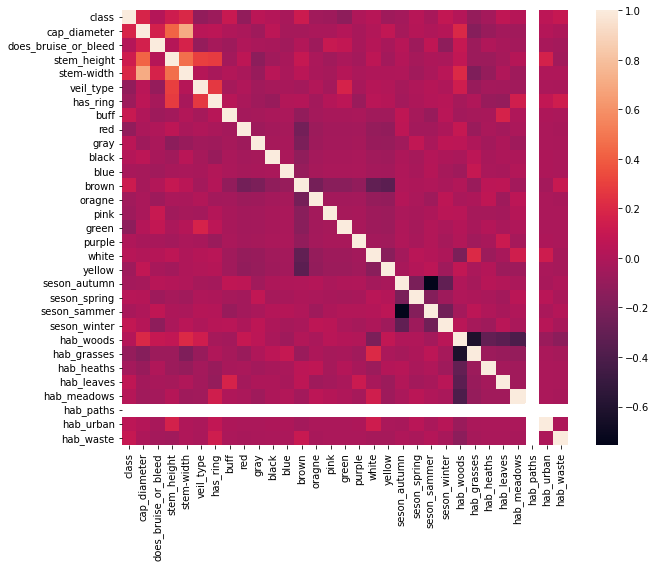

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(corr2)

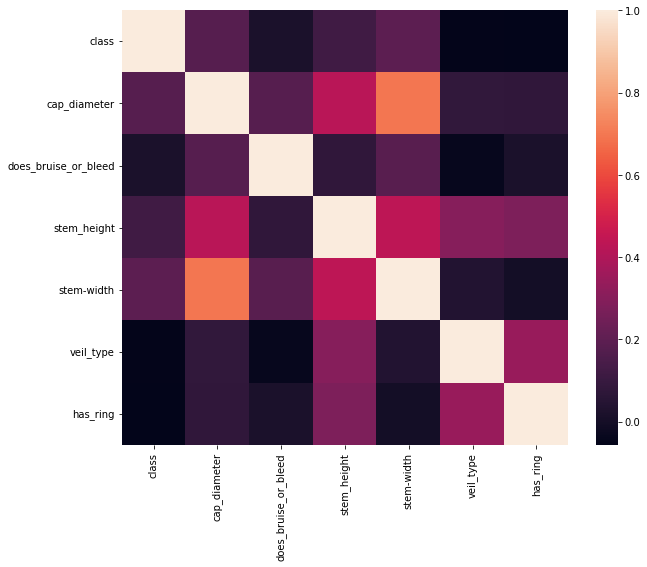

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

#Usunięcie danej hab_paths

In [92]:
df2.drop(['hab_paths'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46949 entries, 0 to 61068
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 46949 non-null  float64
 1   cap_diameter          46949 non-null  float64
 2   cap_shape             46949 non-null  object 
 3   cap_surface           46949 non-null  object 
 4   cap_color             46949 non-null  object 
 5   does_bruise_or_bleed  46949 non-null  float64
 6   gill_attachment       38830 non-null  object 
 7   gill_spacing          46949 non-null  object 
 8   gill_color            46949 non-null  object 
 9   stem_height           46949 non-null  float64
 10  stem-width            46949 non-null  float64
 11  stem-color            46949 non-null  object 
 12  veil_type             46949 non-null  float64
 13  has_ring              46949 non-null  float64
 14  ring_type             46949 non-null  object 
 15  habitat            

In [96]:
ringtype_onehot=pd.get_dummies(df['ring_type'])

In [98]:
df2.ring_type.value_counts()

f    37771
e     2274
z     2118
l     1427
r     1399
p     1265
m      353
g      342
Name: ring_type, dtype: int64

In [ ]:
#cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?

In [99]:
ringtype_onehot=ringtype_onehot.rename(columns={'f':'brak','m':'movable','y':'scaly','z':'zone','s':'sheathing','p':'pendant','l':'large','g':'grooved','r':'flaring'})

In [100]:
df2 = pd.concat([df2,ringtype_onehot ], axis=1)